ADMN5015 - Assignment 4 - Marketing - Speech-to-text

HHK

Ali

Allen

Elvis Mauricio Ramirez

Business Analytics, St Lawrence College - Kingston

ADMN5015 - Artificial Intelligence in Marketing

Professor: Raheleh Barkhordari

Oct, 2023

In [42]:
pip install google-cloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install google-cloud-storage


  Using cached google_cloud_storage-2.12.0-py2.py3-none-any.whl (120 kB)
  Using cached google_cloud_core-2.3.3-py2.py3-none-any.whl (29 kB)
  Using cached google_auth-2.23.3-py2.py3-none-any.whl (182 kB)
  Using cached google_crc32c-1.5.0-cp310-cp310-win_amd64.whl (27 kB)
  Using cached google_resumable_media-2.6.0-py2.py3-none-any.whl (80 kB)
  Using cached google_api_core-2.12.0-py3-none-any.whl (121 kB)
  Using cached protobuf-4.24.4-cp310-abi3-win_amd64.whl (430 kB)
  Using cached googleapis_common_protos-1.61.0-py2.py3-none-any.whl (230 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install google-cloud-speech

  Using cached google_cloud_speech-2.21.1-py2.py3-none-any.whl (273 kB)
  Using cached proto_plus-1.22.3-py3-none-any.whl (48 kB)
  Using cached grpcio-1.59.0-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cached grpcio_status-1.59.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pydub

In [1]:
pip install --upgrade google-cloud-language

     -------------------------------------- 138.7/138.7 kB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install firebase-admin


     -------------------------------------- 119.9/119.9 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 289.4/289.4 kB 9.0 MB/s eta 0:00:00
     --------------------------------------- 12.6/12.6 MB 15.6 MB/s eta 0:00:00
     ---------------------------------------- 96.9/96.9 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.4.0
    Uninstalling PyJWT-2.4.0:
      Successfully uninstalled PyJWT-2.4.0


# set credentials


In [3]:
import os
from google.cloud import storage
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/elvis/Downloads/velvety-tube-403001-968076f7ec78.json"



In [4]:
client = storage.Client()
bucket = client.bucket("my_newbucketslc2")
#blob = bucket.blob("test.wav")
#blob.download_to_filename("test.wav")

print(f"Bucket {bucket.name} created.")

Bucket my_newbucketslc2 created.


In [5]:
import os

# Imports the Google Cloud client library
from google.cloud import storage

import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current working directory:", current_directory)

Current working directory: C:\Users\elvis


In [7]:
import os
from google.cloud import storage
from google.oauth2.service_account import Credentials

# Get the current working directory
current_directory = os.getcwd()

# Set the path to the service account key JSON file
key_filename = "velvety-tube-403001-968076f7ec78.json"
key_path = os.path.join(current_directory, key_filename)

# Explicitly load the credentials from the service account key file
credentials = Credentials.from_service_account_file(key_path)

# Instantiates a client with the loaded credentials
storage_client = storage.Client(credentials=credentials)

# The name for the new bucket
bucket_name = "my_newbucketslc3"

# Creates the new bucket
bucket = storage_client.create_bucket(bucket_name)

print(f"Bucket {bucket.name} created.")

Bucket my_newbucketslc3 created.


In [40]:
from google.cloud import storage


def list_blobs(bucket_name):
    """Lists all the blobs in the bucket."""
    # bucket_name = "newbucketslc"

    storage_client = storage.Client()

    # Note: Client.list_blobs requires at least package version 1.17.0.
    blobs = storage_client.list_blobs(bucket_name)

    # Note: The call returns a response only when the iterator is consumed.
    for blob in blobs:
        print(blob.name)

# Using MP3 file to convert WAV

In [ ]:
from pydub import AudioSegment

# Specify the path to your MP3 file
mp3_file_path = "C:/Users/elvis/input_sample.mp3"

# Read the MP3 file
audio = AudioSegment.from_mp3(mp3_file_path)

# Export the audio as WAV format
wav_file_path = "C:/Users/elvis/output_sample.wav"
audio.export(wav_file_path, format="wav")

In [8]:
from google.cloud import storage


def list_blobs(bucket_name):
    """Lists all the blobs in the bucket."""
    bucket_name = "my_newbucketslc3 "

    storage_client = storage.Client()

    blobs = storage_client.list_blobs(bucket_name)

    for blob in blobs:
        print(blob.name)

# Upload WAV file to GCP bucket

In [9]:
#upload an audio file (.VAW) to a storage bucket, it may not work because I didn't have an adio file, just wanted to keep the codes here
from google.cloud import storage

def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the GCP Storage bucket."""
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)
    blob.upload_from_filename(source_file_name)
    print(f'File {source_file_name} uploaded to {destination_blob_name} in the {bucket_name} bucket.')

# Provide the path to your local audio WAV file and specify the name you want to give the file in the bucket
#source_file_name = '/path/to/your/local/audio_file.wav'  # Replace with your local file path
source_file_name = 'C:/Users/elvis/test.wav'  # Replace with your local file path
destination_blob_name = 'test.wav'  # The name you want the file to have in the bucket

# Call the function to upload the file to the 'newbucketslc' bucket
upload_blob('my_newbucketslc3', source_file_name, destination_blob_name)

File C:/Users/elvis/test.wav uploaded to test.wav in the my_newbucketslc3 bucket.


# First option

In [16]:
from google.cloud import speech



def run_quickstart() -> speech.RecognizeResponse:
    # Instantiates a client
    client = speech.SpeechClient()
   
    transcripts=[]
    # Specify the Google Cloud Storage URI of the audio file
    gcs_uri = "gs://my_newbucketslc3/test.wav"

    audio = speech.RecognitionAudio(uri=gcs_uri)

    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=44100,
        audio_channel_count=2,
        language_code="en-US",
    )

    # Detects speech in the audio file asynchronously
    operation = client.long_running_recognize(config=config, audio=audio)

    print("Waiting for operation to complete...")
    response = operation.result()

    for result in response.results:
        print(f"Transcript: {result.alternatives[0].transcript}")
        transcript = result.alternatives[0].transcript
        transcripts.append(transcript)
    
    return transcripts       
            
text=run_quickstart()

Waiting for operation to complete...
Transcript: so you're running a little late today and you haven't had your fresh cup of coffee yet
Transcript:  no matter the weather or traffic we deliver fresh coffee and bagels
Transcript:  the Java Cafe


# Second option

# Extract the text from your audio file

In [11]:
from google.cloud import speech

client = speech.SpeechClient()
with open("test.wav", "rb") as audio_file:
    content = audio_file.read()

audio = speech.RecognitionAudio(content=content)

config = speech.RecognitionConfig(
    encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=44100,
    audio_channel_count=2,
    language_code="en-US",
)

response = client.recognize(config=config, audio=audio)

for result in response.results:
    print("Transcript: {}".format(result.alternatives[0].transcript))

Transcript: so you're running a little late today and you haven't had your fresh cup of coffee yet
Transcript:  no matter the weather or traffic we deliver fresh coffee and bagels
Transcript:  the Java Cafe


In [18]:
print(text)

["so you're running a little late today and you haven't had your fresh cup of coffee yet", ' no matter the weather or traffic we deliver fresh coffee and bagels', ' the Java Cafe']


# Sentimental analysis

In [21]:
# Imports the Google Cloud client library
from google.cloud import language_v1

# Instantiates a client
client = language_v1.LanguageServiceClient()

for segment in text:
    # Create a document for each segment
    document = language_v1.types.Document(
        content=segment, type_=language_v1.types.Document.Type.PLAIN_TEXT
    )

    # Detect the sentiment of the segment
    sentiment = client.analyze_sentiment(
        request={"document": document}
    ).document_sentiment

    print(f"Text: {segment}")
    print(f"Sentiment: Score={sentiment.score}, Magnitude={sentiment.magnitude}")
    print("\n")

Text: so you're running a little late today and you haven't had your fresh cup of coffee yet
Sentiment: Score=-0.30000001192092896, Magnitude=0.30000001192092896


Text:  no matter the weather or traffic we deliver fresh coffee and bagels
Sentiment: Score=0.699999988079071, Magnitude=0.699999988079071


Text:  the Java Cafe
Sentiment: Score=0.0, Magnitude=0.0




In [22]:

import datetime
from google.cloud import language_v1

# Initialize a list to store the transcript segment data
transcript_data = []

# Imports the Google Cloud client library
from google.cloud import language_v1

# Instantiates a client
client = language_v1.LanguageServiceClient()


# Initialize variables to calculate the average sentiment score
total_score = 0.0
num_segments = 0

for segment in text:
    # Create a document for each segment
    document = language_v1.types.Document(
        content=segment, type_=language_v1.types.Document.Type.PLAIN_TEXT
    )

    # Detect the sentiment of the segment
    sentiment = client.analyze_sentiment(
        request={"document": document}
    ).document_sentiment

    # Calculate the average sentiment score
    total_score += sentiment.score
    num_segments += 1

    # Create a dictionary for the segment data
    segment_data = {
        "wma_filename":"test.wav",
        "sentence_number": num_segments,
        "sentence_text": segment,
        "sentiment": sentiment.score,
        "magnitude": sentiment.magnitude,
        "transcription_date": datetime.date.today().strftime("%Y-%m-%d"),
    }

    # Append the segment data to the list
    transcript_data.append(segment_data)

# Calculate the average sentiment score
average_score = total_score / num_segments

# Print the average sentiment score
print(f"Average Sentiment Score: {average_score}")

if average_score >= 0.05:
    print("Overall Sentiment: Positive")
elif average_score <= -0.05:
    print("Overall Sentiment: Negative")
else:
    print("Overall Sentiment: Neutral")




Average Sentiment Score: 0.13333332538604736
Overall Sentiment: Positive


In [23]:
# Print the transcript data
for segment_data in transcript_data:
    print(segment_data)

{'wma_filename': 'test.wav', 'sentence_number': 1, 'sentence_text': "so you're running a little late today and you haven't had your fresh cup of coffee yet", 'sentiment': -0.30000001192092896, 'magnitude': 0.30000001192092896, 'transcription_date': '2023-10-25'}
{'wma_filename': 'test.wav', 'sentence_number': 2, 'sentence_text': ' no matter the weather or traffic we deliver fresh coffee and bagels', 'sentiment': 0.699999988079071, 'magnitude': 0.699999988079071, 'transcription_date': '2023-10-25'}
{'wma_filename': 'test.wav', 'sentence_number': 3, 'sentence_text': ' the Java Cafe', 'sentiment': 0.0, 'magnitude': 0.0, 'transcription_date': '2023-10-25'}


# Save into NoSQL - Firestore database

In [28]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account.
cred = credentials.Certificate("C:/Users/elvis/Downloads/velvety-tube-403001-968076f7ec78.json")

app = firebase_admin.initialize_app(cred)

db = firestore.client()

ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [31]:
doc_ref = db.collection("users").document("alovelace")
doc_ref.set({"first": "Ada", "last": "Lovelace", "born": 1815})

update_time {
  seconds: 1698261554
  nanos: 84075000
}

In [32]:
users_ref = db.collection("users")
docs = users_ref.stream()

for doc in docs:
    print(f"{doc.id} => {doc.to_dict()}")

alovelace => {'last': 'Lovelace', 'first': 'Ada', 'born': 1815}


# upload the dictonary to firestore

In [33]:
# Create a dictionary for your record
records = transcript_data

for record in records:
    db.collection('speech_records').add(record)

# Read data from firestore

In [34]:
# Reference to the "speech_records" collection
collection_ref = db.collection("speech_records")

# Query the collection and retrieve the documents
documents = collection_ref.stream()

# Iterate through the documents and print their data
for doc in documents:
    data = doc.to_dict()
    print(data)

{'sentiment': 0.0, 'transcription_date': '2023-10-25', 'sentence_number': 3, 'wma_filename': 'test.wav', 'magnitude': 0.0, 'sentence_text': ' the Java Cafe'}
{'sentiment': -0.30000001192092896, 'transcription_date': '2023-10-25', 'sentence_number': 1, 'wma_filename': 'test.wav', 'magnitude': 0.30000001192092896, 'sentence_text': "so you're running a little late today and you haven't had your fresh cup of coffee yet"}
{'sentiment': 0.699999988079071, 'transcription_date': '2023-10-25', 'sentence_number': 2, 'wma_filename': 'test.wav', 'magnitude': 0.699999988079071, 'sentence_text': ' no matter the weather or traffic we deliver fresh coffee and bagels'}


# Findings

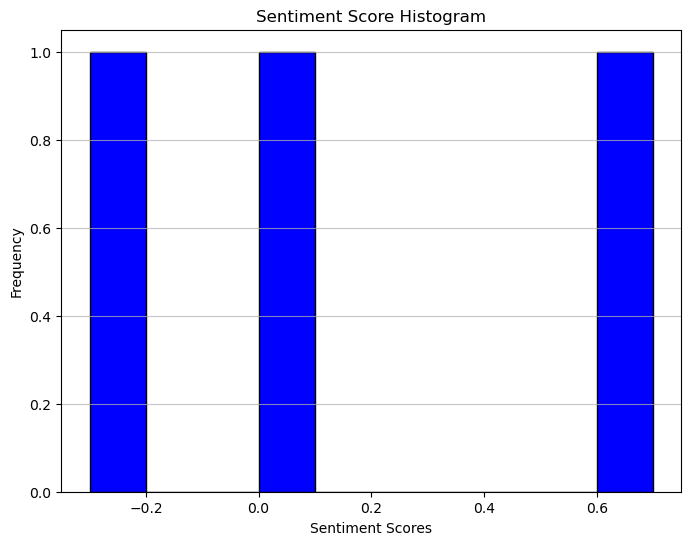

In [38]:
import matplotlib.pyplot as plt


# Extract sentiment scores from the transcript data
sentiment_scores = [data["sentiment"] for data in transcript_data]

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(sentiment_scores, bins=10, color='blue', edgecolor='black')
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.title('Sentiment Score Histogram')
plt.grid(axis='y', alpha=0.75)

# Show the histogram
plt.show()


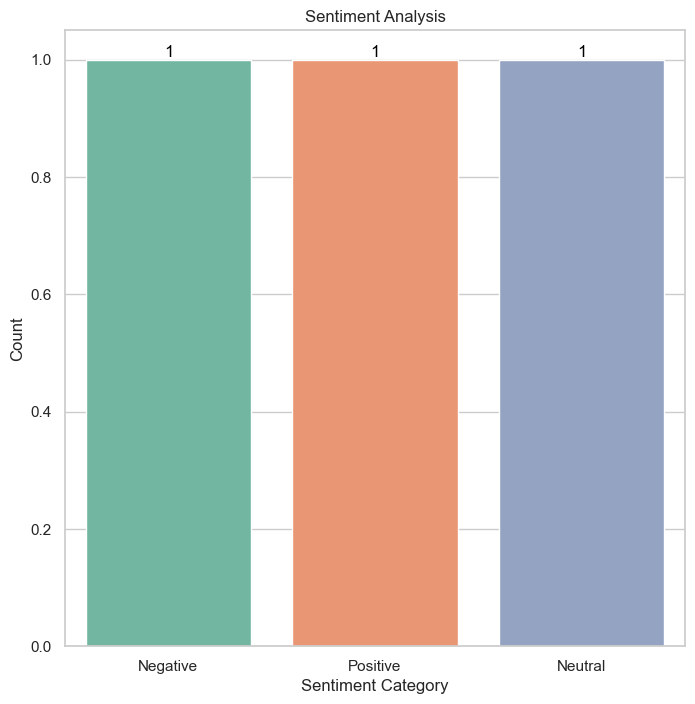

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extract sentiment scores from the transcript data
sentiment_scores = [data["sentiment"] for data in transcript_data]

# Create sentiment categories
sentiment_categories = ['Negative' if score < -0.05 else 'Positive' if score > 0.05 else 'Neutral' for score in sentiment_scores]

# Create a countplot using Seaborn
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")

# Countplot with data labels
ax = sns.countplot(x=sentiment_categories, palette="Set2")
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Analysis')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

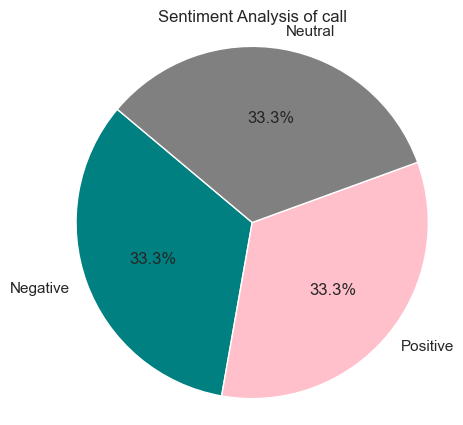

In [40]:
import matplotlib.pyplot as plt

sentiment_scores = [data["sentiment"] for data in transcript_data]
custom_colors = ['Teal', 'pink', 'Grey']

# Create sentiment categories
sentiment_categories = ['Negative' if score < -0.05 else 'Positive' if score > 0.05 else 'Neutral' for score in sentiment_scores]

# Create a dictionary to count the occurrences of each sentiment category
sentiment_count = {}
for category in sentiment_categories:
    sentiment_count[category] = sentiment_count.get(category, 0) + 1

# Extract sentiment categories and their counts
categories = list(sentiment_count.keys())
counts = list(sentiment_count.values())

# Create a pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Analysis of call')
plt.show()

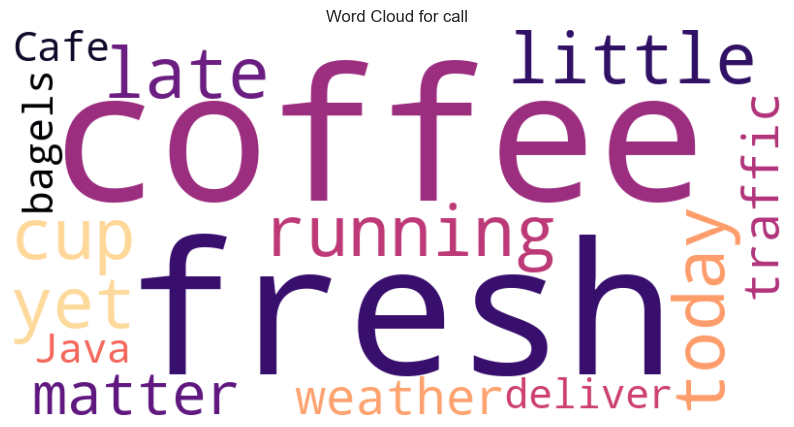

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Concatenate all sentence_text into a single string
all_text = " ".join(data["sentence_text"] for data in transcript_data)

# Generate the word cloud for all_text
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(all_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for call")
plt.show()